# Correlation Coeffients
Here, we compute correlation coefficients between the study variables. We examine the p-values of the coeffients at several thresholds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.patches as mpatches

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/data.csv', low_memory=False)

In [3]:
variables = ['CUHI Day', 'CUHI Night', 'SUHI Day', 'SUHI Night', 
             'Built Fraction', 'Grass Fraction', 'Tree Fraction', 'Elevation', 
             'Albedo', 'Built Albedo', 'Grass Albedo', 'Tree Albedo', 'Median Income']

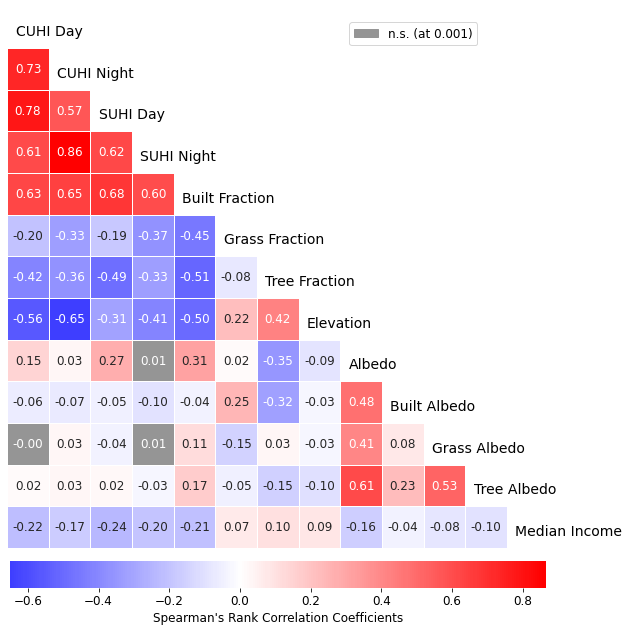

In [5]:
font = {'size': 12}
plt.rc('font', **font)
psig = 0.001 # set the significance threshold
pvals = data[variables].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*data[variables].corr().shape)
matrix = data[variables].corr(method='spearman')

mask = np.zeros_like(matrix)

mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(12,12))

sns.heatmap(matrix[pvals<psig], center = 0, square = True, mask=mask, ax=ax, fmt = ".2f", annot= True, annot_kws={'size': 12},
            linecolor='white', linewidths=0.5, xticklabels=False, cmap='bwr',
            cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.02, shrink=0.8, 
                            label="Spearman's Rank Correlation Coefficients"));
sns.heatmap(matrix[pvals>=psig], center = 0, square = True, mask=mask, ax=ax, fmt = ".2f", annot= True,
                linecolor='white', linewidths=0.5, xticklabels=False, cmap=sns.color_palette("Greys", n_colors=1, desat=1),
                cbar = False);
ax.tick_params(axis='both', which='both', labelsize=12)

colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [f"n.s. (at {psig})"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
ax.legend(handles=patches, bbox_to_anchor=(0.75, 0.95), loc='center', fontsize=12)

plt.tick_params(left = False, labelleft=False) 
for i, label in enumerate(variables):
    ax.text(i + 0.2, i + 0.6, label, ha='left', va='center', fontsize=14)

font = {'size': 12}
plt.rc('font', **font)
    
plt.savefig('graphs/correlation/feature_correlation.svg', bbox_inches='tight', dpi=300)
plt.savefig('graphs/correlation/feature_correlation.jpg', bbox_inches='tight', dpi=1000)